In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
import pandas as pd

In [70]:
def degree(g, nodes=None, as_list=True):
    deg = None
    if nodes:
        deg = dict(g.degree(nodes))
    else:
        deg = dict(g.degree())
    
    if as_list:
        return list(deg.values())
    return deg

def degree_plot(g, nodes, title=''):
    deg = degree(g, nodes)
    bins = 100
    if len(nodes) < 100:
        bins = len(nodes)
    hist = np.histogram(deg, bins=bins)
    v = range(min(deg), max(deg)+1)
    freqs, edges = hist[0], hist[1]
    n = freqs.size
    means = [(edges[i] + edges[i+1]) / 2 for i in range(n)]
    
    # SCATTER PLOT
    plt.plot(means, freqs, ".")
    plt.xlabel("k")
    plt.ylabel("frequency")
    plt.title("Degree distribution for %s" % title)
    plt.show()
    
    # LOG LOG PLOT
    plt.loglog(means, freqs, ".")
    plt.xlabel("log(k)")
    plt.ylabel("log(frequency)")
    plt.title("Log-log degree distribution for %s" % title)
    plt.show()

In [2]:
USER = 'user'
BIZ = 'biz'

In [3]:
df_biz = pd.read_csv('cleaned_csv/restaurants.csv')

In [4]:
df = pd.read_csv('csv_by_year/2017.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,business_id,date,review_id,stars,user_id
0,f5O7v_X_jCg2itqacRfxhg,2017-10-12,kS4hrhEScwB9V5JATYjvVQ,5,hxqo4NyJFfeOmuoVi--s1A
1,0bjFYstj8USMzEV4ZQldjA,2017-01-19,VKGvSe0SmYcFc5PqjbxLDQ,5,eG6HneK9zLcuZpVuKcsCGQ
2,gZGsReG0VeX4uKViHTB9EQ,2017-08-16,51RHs_V_fjuistnuKxNpEg,5,5ngpW5tf3ep680eG1HxHzA
3,-bd4BQcl1ekgo7avaFngIw,2017-06-28,P7kiSTiwzqm0_LbA71EOPg,5,5ngpW5tf3ep680eG1HxHzA
4,u73j2VQ3TGWdMO-AG7MABw,2017-07-06,7EgEjUpcb8q-B5dPCMvkaQ,2,5ngpW5tf3ep680eG1HxHzA


In [48]:
cities = set(df_biz.city.str.lower())
df_biz['city'] = df_biz.city.str.lower()
city_counts = dict(df_biz.groupby('city').city.count())
most_popular_city = max(city_counts.keys(), key=lambda k: city_counts[k])
most_popular_city, city_counts[most_popular_city]

('toronto', 9678)

In [94]:
df_toronto = df_biz[df_biz.city == most_popular_city]
biz_toronto = list(df_toronto.business_id)
rev_toronto = df[df.business_id.isin(df_toronto.business_id)]
print('Reviews:', len(rev_toronto))
print('Users:', len(set(rev_toronto.business_id)))
print('Businesses:', len(set(rev_toronto.user_id)))

Reviews: 71381
Users: 6174
Businesses: 25411


In [77]:
# A politcian class for storing data in a neat way.
class Node:
    def __init__(self, ID, Type):
        self.ID = ID
        self.Type = Type
    
    def to_string(self):
        return "Node (%s), ID: " % (self.Type, self.ID)
    
    def __hash__(self):
        return hash(self.ID)
    def __eq__(self, other):
        return (
                self.__class__ == other.__class__ and 
                self.ID == other.ID
               )

In [95]:
graph = nx.Graph()
for row in rev_toronto.itertuples():
    b = Node(row.business_id, BIZ)
    u = Node(row.user_id, USER)
    graph.add_edge(u, b)

In [97]:
print('Nodes:', len(graph.nodes()))
print('Edges:', len(graph.edges()))

Nodes: 31584
Edges: 71381


In [98]:
biz_nodes = [n for n in list(graph.nodes()) if n.Type == BIZ]
user_nodes = [n for n in list(graph.nodes()) if n.Type == USER]

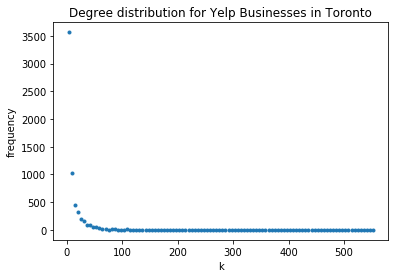

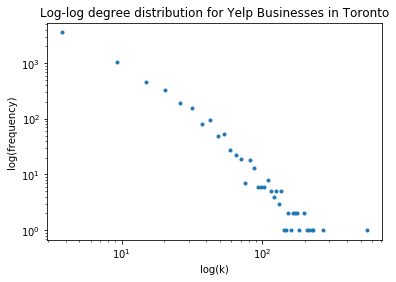

In [99]:
degree_plot(graph, biz_nodes, "Yelp Businesses in Toronto")

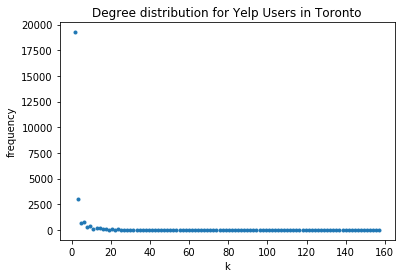

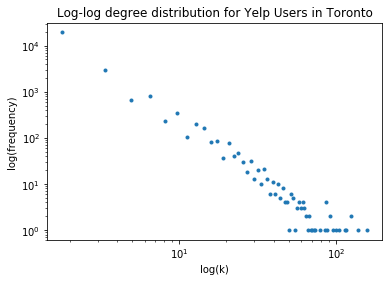

In [100]:
degree_plot(graph, user_nodes, "Yelp Users in Toronto")

In [139]:
ev_centrality = nx.eigenvector_centrality_numpy(graph)

In [140]:
sorted_ev_centrality = sorted(ev_centrality.items(), key=lambda x: x[1], reverse=True)

In [143]:
ev_biz = [(n, ev) for (n, ev) in sorted_ev_centrality if n.Type == BIZ]
ev_user = [(n, ev) for (n, ev) in sorted_ev_centrality if n.Type == USER]

In [144]:
ev_biz[:5]

[(<__main__.Node at 0xa1ac31e48>, 0.34417516647169544),
 (<__main__.Node at 0xa1ac0b128>, 0.11926808546760595),
 (<__main__.Node at 0xa1be61da0>, 0.11365586909784971),
 (<__main__.Node at 0xa1be1d160>, 0.10045395212723696),
 (<__main__.Node at 0xa1c0f17b8>, 0.09946310683259328)]

In [145]:
ev_user[:5]

[(<__main__.Node at 0xa283f9978>, 0.0996279081295459),
 (<__main__.Node at 0xa246369e8>, 0.09796464571163468),
 (<__main__.Node at 0xa23c1fba8>, 0.09620291704686658),
 (<__main__.Node at 0xa28616ac8>, 0.08979848420438537),
 (<__main__.Node at 0xa289f5c88>, 0.08443442820007342)]

In [151]:
for i in range(20):
    b = df_biz[df_biz.business_id == ev_biz[i][0].ID]
    print(list(b.name))

['Pai Northern Thai Kitchen']
['GB Hand-pulled Noodles']
['Pablo Cheesetart Canada']
['Seven Lives Tacos Y Mariscos']
['Bang Bang Ice Cream and Bakery']
['iHalo Krunch']
['KINKA IZAKAYA ORIGINAL']
['Miku']
['Tinuno']
['Tsujiri']
['Fat Ninja Bite']
["Eva's Original Chimneys"]
['Gusto 101']
['Kekou Gelato']
['Khao San Road']
['Charidise']
["Mildred's Temple Kitchen"]
["Blaze Fast-Fire'd Pizza"]
['Saku Sushi']
['The Halal Guys']


## Plotting the subgraph

In [118]:
top_reviews = rev_toronto.groupby("user_id").filter(lambda x: len(x) > 5)
top_reviews = top_reviews.groupby("business_id").filter(lambda x: len(x) > 50)
print('Reviews:', len(top_reviews))
print('Users:', len(set(top_reviews.user_id)))
print('Businesses:', len(set(top_reviews.business_id)))

Reviews: 4278
Users: 1685
Businesses: 57


In [119]:
sub_graph = nx.Graph()
for row in top_reviews.itertuples():
    b = Node(row.business_id, BIZ)
    u = Node(row.user_id, USER)
    sub_graph.add_edge(u, b)

In [107]:
from fa2l import force_atlas2_layout

In [124]:
nodes = sub_graph.nodes()
degrees = 5 * np.array(degree(sub_graph))
color_map = []
for p in nodes:
    if p.Type == USER: 
        color_map.append("red")
    elif p.Type == BIZ: 
        color_map.append("blue")
    else: 
        color_map.append("#black")

In [129]:
positions = force_atlas2_layout(sub_graph,
                                iterations=3,
                                pos_list=None,
                                node_masses=None,
                                outbound_attraction_distribution=False,
                                lin_log_mode=False,
                                prevent_overlapping=False,
                                edge_weight_influence=1.0,

                                jitter_tolerance=1.0,
                                barnes_hut_optimize=False,
                                barnes_hut_theta=0.5,

                                scaling_ratio=2.0,
                                strong_gravity_mode=False,
                                multithread=False,
                                gravity=1.0)

/Users/tnni/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/tnni/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


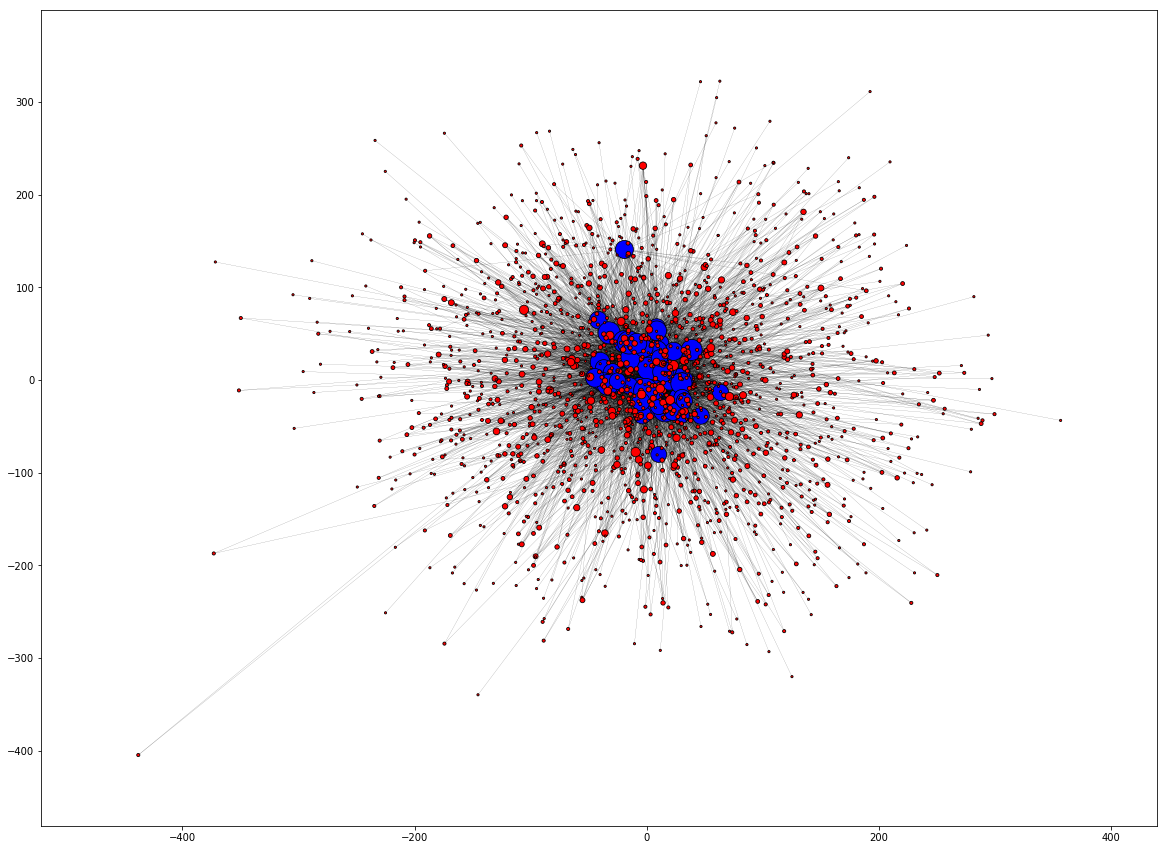

In [137]:
plt.figure(figsize=[20,15])
nx.draw_networkx(sub_graph, positions, with_labels=False, node_color=color_map, node_size=degrees, width=0.1, linewidths=0.8)
plt.gca().collections[0].set_edgecolor("#000000") 
plt.show()

In [154]:
B_deg = degree(B, as_list=False)

In [155]:
sort_degree = sorted(deg_biz.items(), key=lambda x: x[1], reverse=True)